In [262]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract
from PIL import Image
import os
import re
import pandas as pd
%matplotlib inline


In [263]:
input_path = './input_images/'
filenames = os.listdir(input_path)
filenames

['dl2.jpeg', 'dl1.jpeg']

,Name,DL No,DOB,Address,S/W/D,BG
0,TRUPTI KAMELE,MHO3 20080006266,6-09-1984,"109/3151, KANNAMWAR NAGAR NO-2VIKHROLI (E) MUMBAI",MADHUKAR KAMBLE,AB+
1,VINAYAK P MULI,MH37 20080001577,4-06-1973,"AT SHUKRAWAR PETH, WASHIM.TQ DIST WASHIM",PRABHAKAR MULI,


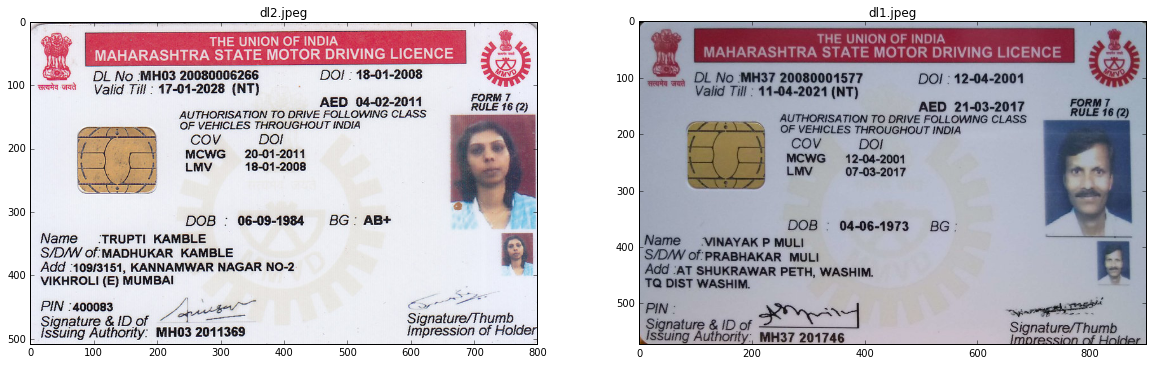

In [264]:
data = pd.DataFrame(columns=['Name','DL No','DOB','Address','S/W/D','BG'])
i = 0 
fig = plt.figure(figsize=(20,20))
for files in filenames: 
    #print(files)
    img = cv2.imread(input_path+files)
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    #img= cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

    gray_img = cv2.fastNlMeansDenoising(gray_img) 

    _, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY_INV)

    #plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))


    #plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

    filename = "{}.png".format(os.getpid())
    cv2.imwrite(filename, threshold_img)
    
    text = pytesseract.image_to_string(Image.open(filename))
    f = open('tesseract_output.txt','w')
    f.write(text.encode('utf8'))
    f.close()
    #print(text)
    
    f = open('tesseract_output.txt','r')
    text = f.read()
    f.close()
    birth_date = re.findall(r'.*DOB.*(\d+-\d+-\d+).*',text)
    data.loc[i,'DOB'] = birth_date[0]

    DL = re.findall(r'.*D.*([A-Za-z0-9]{4}.*[\d]{11})',text)
    data.loc[i,'DL No'] = DL[0]
    
    blood_group = re.findall(r'.*DOB.*\d+-\d+-\d+(.*[a-zA-Z0-9]+.*)',text)
    blood_group = blood_group[0].strip(' ')
    blood_group = blood_group[2:]
    data.loc[i,'BG'] = blood_group


    name = re.findall(r'.*Name(.*[a-zA-Z]+)',text)
    name = name[0].strip("") 
    data.loc[i,'Name'] = name

    sdw = re.findall(r'.*S.D.W.*of(.*[a-zA-Z]+)',text) 
    data.loc[i,'S/W/D'] = sdw[0]
    
    add = re.findall(r'.*Add (.*[a-zA-Z]+.*\n.*[a-zA-Z]+).*\n',text)
    add = add[0].replace("\n","")  
    data.loc[i,'Address'] = add
    
    #print(i)
    a = fig.add_subplot(1,2,i+1)
    imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    a.set_title(files)

    i+=1

data.to_csv('ocr_output.csv')    
data.head()        

